In [1]:
import json
import pandas as pd
import os
from vega import VegaLite
%run utils

benchmark_dir = "../benchmarks"

def load_input_table(fname):
    with open(os.path.join(benchmark_dir, fname), "r") as f:
        benchmark = json.load(f)
        input_data = benchmark["input_data"]
        df = pd.DataFrame.from_records(input_data)
        df = load_and_clean_table(df)
        return df

   Actual Profits  Number of Units   Quarter
0            3358               23  Quarter1
1            3829               27  Quarter2
2            2374               15  Quarter3
3            3373               43  Quarter4


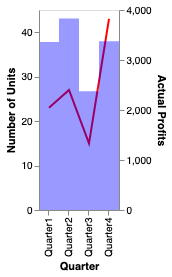

In [2]:
df1 = load_input_table("001.json")

#df = pd.melt(df, id_vars='Quarter', value_vars=["Actual Profits", "No. of Units"])

print(df1)

VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "encoding": {
        "x": { "field": "Quarter", "type": "nominal" }
    },
    "layer": [
        {
            "mark": {"stroke": "red", "type": "line"},
            "encoding": {
                "y": {"field": "Number of Units", "type": "quantitative"}
            }
        }, 
        {
            "mark": {"opacity": 0.4, "type": "bar", "color": "blue"},
            "encoding": {
                "y": {"type": "quantitative", "field": "Actual Profits"}
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}, df1)

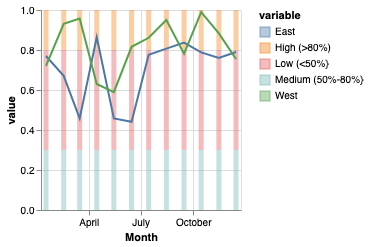

In [3]:
df2 = load_input_table("002.json")

df2_0 = pd.melt(df2, id_vars='Month', value_vars=["Low (<50%}", "Medium (50%-80%}", "High (>80%)", "East", "West"])

#print(df2_0)

VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "encoding": {
        "x": { "field": "Month", "type": "temporal" }
    },
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "transform": [{"filter": "datum.variable != \"East\" && datum.variable != \"West\""}],
            "encoding": {
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"}
            }
        }, 
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.variable == \"East\" || datum.variable == \"West\""}],
            "encoding": {
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"}
            }
        }
  ]
}, df2_0)

    Month  Net Cash Flow  Net Cash Flow Sum       c      d
0   Start          80000              80000       0  False
1     Apr          -5003              74997   80000   True
2     May         -16700              58297   74997   True
3     Jun          48802             107099   58297  False
4     Jul         -11198              95901  107099   True
5     Aug         -35260              60641   95901   True
6     Sep          18220              78861   60641  False
7     Oct         -23840              55021   78861   True
8     Nov          43250              98271   55021  False
9     Dec         -18280              79991   98271   True
10    Jan          26670             106661   79991  False
11    Feb          15000             121661  106661  False
12    Mar          24750             146411  121661  False


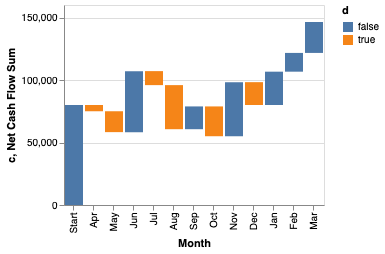

In [29]:
df3 = load_input_table("003.json")

df3_1 = df3["Net Cash Flow"].cumsum()
df3 = df3.join(df3_1, lsuffix='', rsuffix=' Sum')
df3 = df3.assign(c=df3["Net Cash Flow Sum"]-df3["Net Cash Flow"])
df3 = df3.assign(d=df3["c"]>df3["Net Cash Flow Sum"])

print(df3)

VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": {"field": "Month", "type": "nominal", "sort": "none"},
        "y2": {
          "field": "Net Cash Flow Sum",
          "type": "quantitative"    
        },
        "y": {"field": "c", "type": "quantitative"},
        "color": {"field": "d", "type": "nominal"},
    }
}, df3)

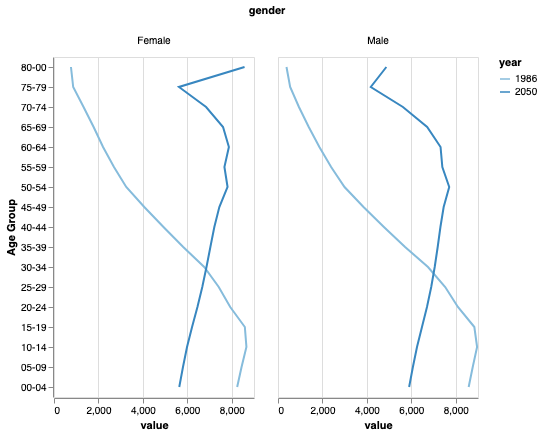

In [5]:
df4 = load_input_table("004.json")

df4 = pd.melt(df4, id_vars='Age Group', value_vars=["Female-1986", "Female-2050", "Male-1986", "Male-2050"])

split_col = df4["variable"].str.split("-", expand=True)
df4["gender"] = split_col[0]
df4["year"] = split_col[1]

#print(df4)

VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "y": {"field": "Age Group", "type": "nominal", "sort": "descending"},
        "x": {
          "field": "value",
          "type": "quantitative"    
        },
        "column": {"field": "gender", "type": "nominal"},
        "color": {"field": "year","type": "ordinal"},
    }
}, df4)

   Month variable    value
0    Jan     Cost   6.0000
1    Feb     Cost  15.0000
2    Mar     Cost  24.0000
3    Apr     Cost  33.0000
4    May     Cost  42.0000
5    Jun     Cost  51.0000
6    Jan   Profit   4.0000
7    Feb   Profit   5.0000
8    Mar   Profit   6.0000
9    Apr   Profit   7.0000
10   May   Profit   8.0000
11   Jun   Profit   9.0000
12   Jan      ROI   0.6667
13   Feb      ROI   0.3333
14   Mar      ROI   0.2500
15   Apr      ROI   0.2121
16   May      ROI   0.1905
17   Jun      ROI   0.1765
18   Jan    Sales  10.0000
19   Feb    Sales  20.0000
20   Mar    Sales  30.0000
21   Apr    Sales  40.0000
22   May    Sales  50.0000
23   Jun    Sales  60.0000


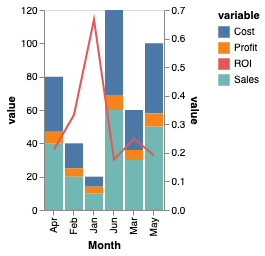

In [30]:
df5 = load_input_table("005.json")

df5 = pd.melt(df5, id_vars='Month', value_vars=["Cost", "Profit", "ROI", "Sales"])

print(df5)

VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "encoding": {
        "x": { "field": "Month", "type": "nominal" }
    },
    "layer": [
        {
            "mark": {"type": "bar"},
            "transform": [{"filter": "datum.variable != \"ROI\""}],
            "encoding": {
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"}
            }
        },
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.variable == \"ROI\""}],
            "encoding": {
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"}
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}, df5)

     Bucket  variable  value
0  Bucket E    Actual    115
1  Bucket D    Actual     90
2  Bucket C    Actual    115
3  Bucket B    Actual    140
4  Bucket A    Actual    150
5  Bucket E  Budgeted    100
6  Bucket D  Budgeted    100
7  Bucket C  Budgeted    125
8  Bucket B  Budgeted    125
9  Bucket A  Budgeted    140


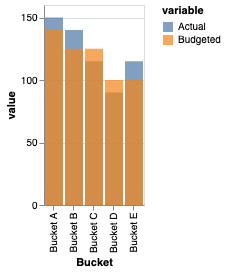

In [7]:
df6 = load_input_table("006.json")

df6 = pd.melt(df6, id_vars='Bucket', value_vars=["Actual", "Budgeted"])

print(df6)

VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "transform": [{"filter": "datum.variable != \"ROI\""}],
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "value", "type": "quantitative", "stack": "null"},
        "x": { "field": "Bucket", "type": "nominal" },
        "opacity": {"value": 0.7}
    }
}, df6)

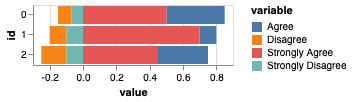

In [8]:
df7 = load_input_table("007.json")

df7['id'] = df7.index
df7 = pd.melt(df7, id_vars='id', value_vars=["Strongly Disagree", "Agree", "Disagree", "Strongly Agree"])
df7['value'].mask(df7['variable'] == "Disagree", -df7["value"], inplace=True)
df7['value'].mask(df7['variable'] == "Strongly Disagree", -df7["value"], inplace=True)

VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "id", "type": "nominal"},
        "x": { "field": "value", "type": "quantitative"}    
    }
}, df7)

Value variable  lower range  means  stddev  upper range
0           Y1         0.39   0.52  0.1328         0.66
1           Y2         0.44   0.57  0.1321         0.70
2           Y3         0.47   0.60  0.1303         0.73
3           Y4         0.50   0.63  0.1266         0.75
4           Y5         0.51   0.63  0.1225         0.75


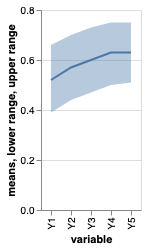

In [44]:
df8 = load_input_table("008.json")

# gather(dat, "col1", "col2", -Value) %>% spread(Value, col2)
df8 = pd.melt(df8, id_vars='Value', value_vars=["Y1", "Y2", "Y3", "Y4", "Y5"])
df8 = df8.pivot(index='variable',columns='Value', values='value').reset_index()
df8 = load_and_clean_table(df8)

print(df8)

VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "encoding": {
        "x": { "field": "variable", "type": "nominal" }
    },
    "layer": [
        {
            "mark": "line",
            "encoding": {
                "y": {"field": "means", "type": "quantitative"}
            }
        }, 
        {
            "mark": {"opacity": 0.4, "type": "area"},
            "encoding": {
                "y": {"type": "quantitative", "field": "lower range"},
                "y2": {"type": "quantitative", "field": "upper range"}
            }
        }
  ]
}, df8)

In [43]:
df9 = load_input_table("009.json")
df9 = pd.melt(df9, id_vars=['Location', 'Rae'], value_vars=["2009", "2010", "2011", "2012", "2013", "2014"])
df9 = df9.pivot_table(index=["Location", "variable"], columns='Rae', values='value').reset_index()

print(df9)

Rae       Location variable  American Indian or Alaska Native  Asian  \
0          Arizona     2009                             0.306  0.150   
1          Arizona     2010                             0.308  0.121   
2          Arizona     2011                             0.275  0.151   
3          Arizona     2012                             0.293  0.162   
4          Arizona     2013                             0.269  0.151   
5          Arizona     2014                             0.241  0.110   
6         Maricopa     2009                             0.164  0.376   
7         Maricopa     2010                             0.405  0.111   
8         Maricopa     2011                             0.339  0.162   
9         Maricopa     2012                             0.308  0.173   
10        Maricopa     2013                             0.148  0.150   
11        Maricopa     2014                             0.296  0.102   
12   United States     2009                             0.292  0